In [0]:
from keras.datasets import imdb
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, Activation, MaxPooling1D
from keras.preprocessing import sequence
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [9]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

print('\n Test loss: %.4f'%(model.evaluate(x_test, y_test)[0]))
print('\n Test Accuracy: %.4f'%(model.evaluate(x_test, y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4529 - accuracy: 0.7641 - val_loss: 0.3372 - val_accuracy: 0.8493
Epoch 2/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2902 - accuracy: 0.8805 - val_loss: 0.3232 - val_accuracy: 0.8594
Epoch 3/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2498 - accuracy: 0.8984 - val_loss: 0.3298 - val_accuracy: 0.8571
Epoch 4/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2108 - accuracy: 0.9185 - val_loss: 0.3378 - val_accuracy: 0.8574
Epoch 5/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1799 - accuracy: 0.9305 - val_loss: 0.3798 - val_accuracy: 0.8467
Epoch 6/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1527 - accuracy: 0.9442 - val_loss: 0.3882 - val_accuracy: 0.8510
Epoch 7/10
25000/25000 [==============================] - 30s 1ms/st

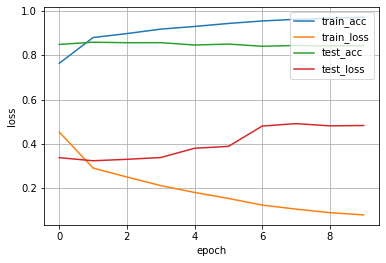

In [14]:
import matplotlib.pyplot as plt

y_acc = history.history['accuracy']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']

plt.plot(y_acc, label='train_acc')
plt.plot(y_loss, label='train_loss')
plt.plot(y_vacc, label='test_acc')
plt.plot(y_vloss, label='test_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()